# Model Training & Algorithm Comparison
In this notebook, we will:
1. Split the dataset into training and testing sets.  
2. Train multiple algorithms on the training set.  
3. Use **10-fold cross-validation** to evaluate accuracy.  
4. Compare results visually using a bar chart, box plot and accuracy table.

This step helps us identify the best-performing models before tuning.


### Step 1: Set Project Root for Python Imports

In [1]:
import sys 
import os 

sys.path.append(os.path.abspath('..'))

### Step 2: Load Titanic dataset
We first load the Titanic dataset into a Pandas DataFrame and preview the first 5 rows.

In [2]:
from src.data import load_data

df =load_data(r"D:\Thiru\ML_Projects\Titanic-Survival-Prediction\Data\processed\cleaned_titanic.csv")
print(df.head(5))

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         0       3    0  22.0      1      0   7.2500         2           2   
1         1       1    1  38.0      1      0  71.2833         0           2   
2         1       3    1  26.0      0      0   7.9250         2           1   
3         1       1    1  35.0      1      0  53.1000         2           2   
4         0       3    0  35.0      0      0   8.0500         2           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


### Step 3: Separate features (X) and target (y)
- Target variable: `Survived`
- Features: all other columns

In [3]:
from src.model import separate_x_y
X, Y=separate_x_y(df)

Features Columns: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone'],
      dtype='object')


Target Column Survived


### Step 4: Split data into training and testing sets
- 80% training, 20% testing
- Random state for reproducibility

In [4]:
from src.model import split_train_test
X_train, X_test, Y_train, Y_test=split_train_test(X,Y)

Training Samples 712
Testing Samples 179


### Step 5: Train ML models
We will train:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- GradientBoostingClassifier
- K-Nearest Neighbors
- SVM
- LinearDiscriminantAnalysis
- GaussianNB

In [5]:
from src.model import train_ml_model
names, res, results=train_ml_model(X_train,Y_train)

LR: 80.616197%
DT: 76.412363%
RFC: 79.915884%
GBC: 82.020736%
KNN: 70.373631%
SVC: 67.271127%
LDA: 79.070814%
NB: 78.785211%


### Step 6: Compare accuracy using bar plot
We can visualize which model performed best.

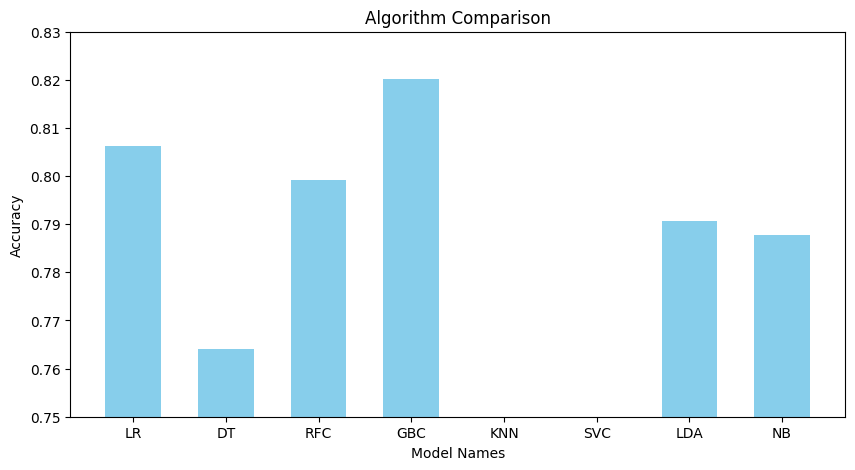

In [6]:
from src.model import plot_accu_bar
plot_accu_bar(names, res)

### Model Comparison Insights

- **Gradient Boosting (GBC)** achieved the highest accuracy (**82.0%**), making it the best candidate model for the Titanic dataset.  
- **Logistic Regression (80.6%)**, **Random Forest (79.9%)**, and **LDA (79.0%)** also performed strongly, showing that both simple linear models and ensembles work well.  
- **Naive Bayes (78.8%)** gave reasonable results, while **Decision Tree (76.4%)** performed worse than its ensemble counterpart, indicating overfitting.  
- **KNN (70.3%)** and **SVC (67.2%)** performed poorly, likely due to lack of proper scaling or hyperparameter tuning.  
- Overall, **ensemble models (GBC, RFC)** provided the best generalization, but Logistic Regression also stands out as a surprisingly strong baseline. 

### Step 7: Compare accuracy using box plot
We can visualize which model performed best.

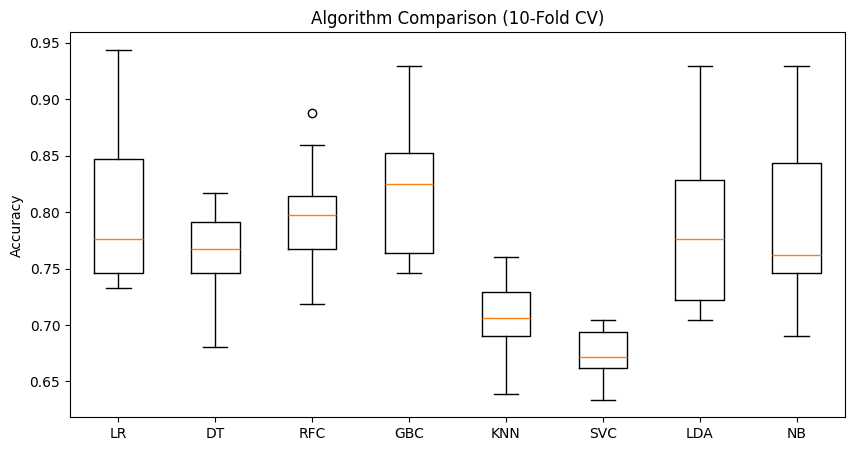

In [6]:
from src.model import plot_accu_box
plot_accu_box(results, names)

### Boxplot Insights (10-Fold CV)

- **Gradient Boosting (GBC)** shows the highest median accuracy, with relatively stable performance across folds.  
- **Logistic Regression (LR)** and **Random Forest (RFC)** also demonstrate strong and consistent performance, with narrow boxes indicating stability.  
- **Decision Tree (DT)** shows more variability across folds, confirming its tendency to overfit.  
- **KNN** and **SVC** not only have lower median accuracy but also higher spread, meaning they are both less accurate and less stable.  
- Overall, **ensemble methods (GBC, RFC)** and **LR** are not only more accurate but also more reliable compared to other models.  

### step 8: Accurancy table
Create a DataFrame to summarize model accuracies

In [8]:
from src.model import accu_table
accu_table(names, res)

  Models  Mean_Accuracy
3    GBC          82.02
0     LR          80.62
2    RFC          79.92
6    LDA          79.07
7     NB          78.79
1     DT          76.41
4    KNN          70.37
5    SVC          67.27


### Insights
- Clear table showing each model's mean accuracy
- Best models can be selected for final evaluation (usually LR or GBC)

## Summary

- Dataset split: 80% training / 20% testing
- Trained **8 ML algorithms**:
  - Logistic Regression (LR)
  - Decision Tree (DT)
  - Random Forest (RFC)
  - Gradient Boosting (GBC)
  - K-Nearest Neighbors (KNN)
  - Support Vector Classifier (SVC)
  - Linear Discriminant Analysis (LDA)
  - Naive Bayes (NB)
- Evaluated using **10-fold Stratified Cross-Validation**
- Bar chart, Box plot and accuracy table show model performance

### Key Takeaways
- **Gradient Boosting** and **Random Forest** performed best
- Logistic Regression is a solid baseline
- Ensemble methods are most commonly used in real-world projects for tabular data